<a href="https://colab.research.google.com/github/17aabbas/Predict-Income/blob/main/Predict_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Adult Income

## Start with diving into our data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.value_counts('fnlwgt')

fnlwgt
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163494      1
163480      1
163460      1
163443      1
1490400     1
Name: count, Length: 28523, dtype: int64

In [ ]:
df.value_counts('education')

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
df.value_counts('gender')

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [ ]:
df.value_counts('occupation')

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df.value_counts('workclass')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

## I am looking to see which values need to be encoded, and potentially dropping columns. For instance fnlwgt is a column I can drop since it seems to be random.

In [ ]:
df = df.drop(['fnlwgt'], axis = 1)

## Encode necessary columns

In [ ]:
df = pd.concat([df.drop(['occupation'], axis = 1), pd.get_dummies(df['occupation']).astype(int).add_prefix('occupation_')], axis = 1)

In [ ]:
df = df.drop(['education'], axis = 1)

df = pd.concat([df.drop(['workclass'], axis = 1), pd.get_dummies(df['workclass']).astype(int).add_prefix('workclass_')], axis = 1)
df = pd.concat([df.drop(['marital-status'], axis = 1), pd.get_dummies(df['marital-status']).astype(int).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop(['relationship'], axis = 1), pd.get_dummies(df['relationship']).astype(int).add_prefix('relationship')], axis = 1)
df = pd.concat([df.drop(['race'], axis = 1), pd.get_dummies(df['race']).astype(int).add_prefix('race')], axis = 1)
df = pd.concat([df.drop(['native-country'], axis = 1), pd.get_dummies(df['native-country']).astype(int).add_prefix('native-country')], axis = 1)

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### At this point, there are no more categorical features.

## Visualize Correlation

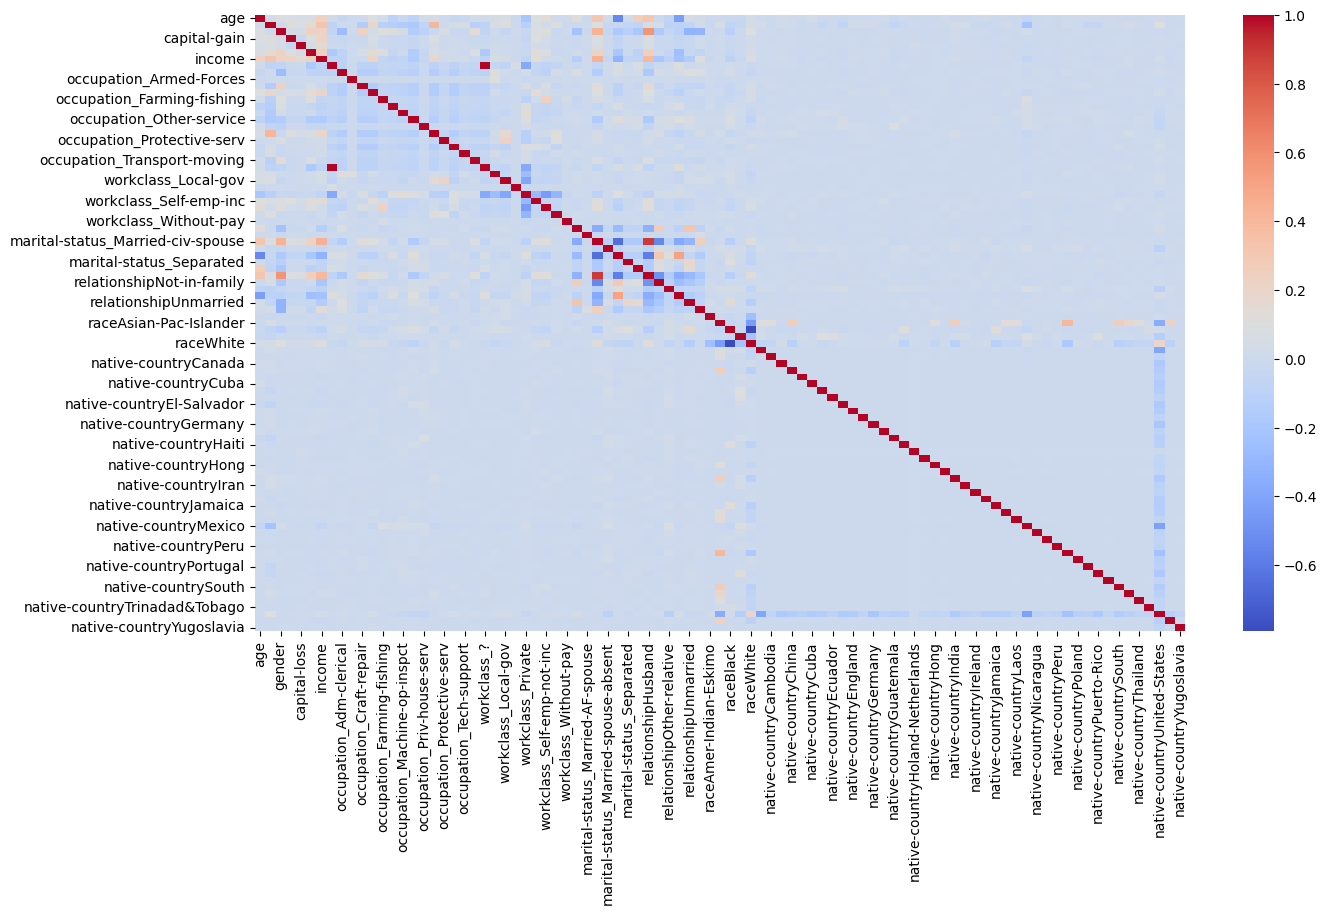

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')
plt.show()

In [ ]:
# We should filter out features that are not too correlated with income (to tune out the noise)

correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_drop].index
df_viz = df.drop(cols_to_drop, axis = 1)

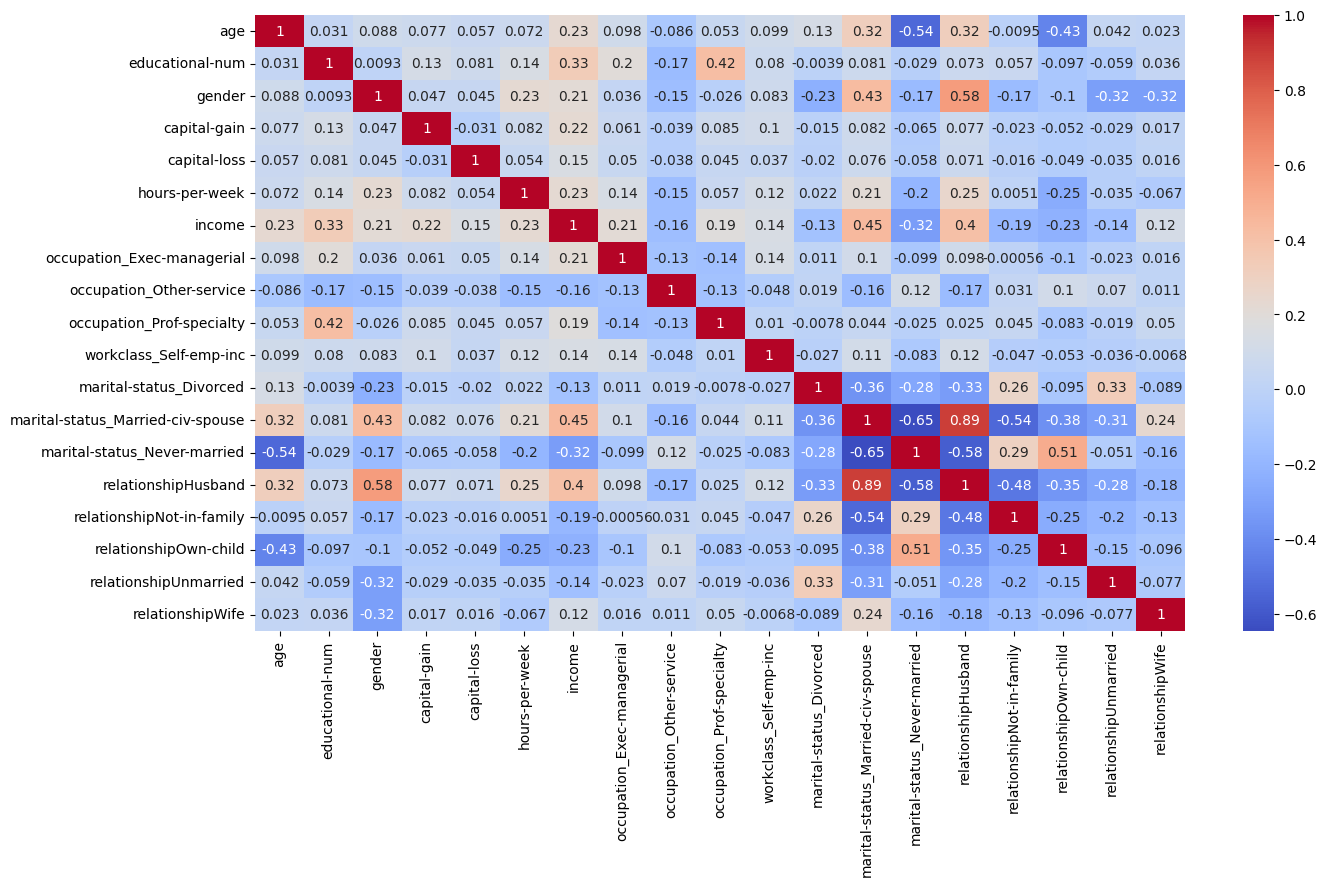

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_viz.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# We will be using a random forest classifier since our data set has a lot of binary features. Therefore, a decision tree will be our best course of action.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.2)

In [ ]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
41095,37,9,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14868,33,9,1,0,0,46,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
36845,30,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
34567,54,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16423,19,10,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,25,10,1,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11612,28,11,1,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5263,38,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33750,31,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
38860,42,10,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24177,73,14,1,0,0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48054,26,13,0,0,0,55,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37190,77,10,0,0,1944,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8611,19,10,1,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20565,45,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11433,33,10,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
42465,18,7,1,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22783,33,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_X = train_df.drop(['income'], axis = 1)
train_y = train_df['income']

test_X = train_df.drop(['income'], axis = 1)
test_y = train_df['income']

In [ ]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
forest.score(train_X, train_y)

0.9747139968776393

In [ ]:
forest.feature_importances_

array([2.30340538e-01, 1.25568976e-01, 1.56161060e-02, 1.12301254e-01,
       3.61775228e-02, 1.13789530e-01, 1.71011513e-03, 4.90358822e-03,
       8.68312150e-05, 6.42735121e-03, 1.88553911e-02, 4.62300017e-03,
       3.34950517e-03, 4.30316006e-03, 7.68907423e-03, 2.06695373e-04,
       1.94317660e-02, 2.84405512e-03, 5.90647703e-03, 4.47079827e-03,
       4.30197403e-03, 1.78802326e-03, 4.88895142e-03, 5.40151414e-03,
       5.97217254e-06, 9.43651286e-03, 6.01691283e-03, 8.37863074e-03,
       4.43023168e-03, 1.15463112e-04, 7.44083823e-03, 3.55700564e-04,
       7.44064249e-02, 9.86758896e-04, 2.84947702e-02, 1.80596498e-03,
       1.56016404e-03, 4.20615506e-02, 1.04762232e-02, 1.65789993e-03,
       8.95320308e-03, 4.57199421e-03, 1.05843135e-02, 1.38987213e-03,
       2.96449341e-03, 4.72630785e-03, 1.00177921e-03, 6.24245169e-03,
       2.90422565e-03, 3.46587282e-04, 1.39135524e-03, 5.26114249e-04,
       3.29450972e-04, 6.66278763e-04, 2.35670849e-04, 1.82021035e-04,
      

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}
importances

{'age': 0.23034053826661452,
 'educational-num': 0.12556897555493254,
 'hours-per-week': 0.11378953002396404,
 'capital-gain': 0.1123012539737824,
 'marital-status_Married-civ-spouse': 0.07440642488494177,
 'relationshipHusband': 0.0420615505674892,
 'capital-loss': 0.03617752282749225,
 'marital-status_Never-married': 0.028494770216909247,
 'occupation_Prof-specialty': 0.01943176601763762,
 'occupation_Exec-managerial': 0.018855391060675575,
 'gender': 0.015616105979469223,
 'relationshipWife': 0.01058431346704329,
 'relationshipNot-in-family': 0.010476223173396644,
 'workclass_Private': 0.009436512856556426,
 'relationshipOwn-child': 0.008953203079755619,
 'workclass_Self-emp-not-inc': 0.008378630740329572,
 'occupation_Other-service': 0.007689074225395147,
 'marital-status_Divorced': 0.007440838225417215,
 'occupation_Craft-repair': 0.006427351205998337,
 'raceWhite': 0.006242451690853663,
 'workclass_Self-emp-inc': 0.0060169128259003396,
 'native-countryUnited-States': 0.0059333825

In [ ]:
forest.score(test_X, test_y)

0.9293629872290329